In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
PATH_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

In [4]:
COLUMNS = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

In [5]:
# Load training data
train_data = pd.read_csv(PATH, names=COLUMNS, skipinitialspace=True)

# Load test data (skip first row as it’s a header/comment)
test_data = pd.read_csv(PATH_test, names=COLUMNS, skiprows=1, skipinitialspace=True)

In [6]:
print(train_data.shape, test_data.shape)

(32561, 15) (16281, 15)


In [7]:
print(train_data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [8]:
label = {'<=50K': 0, '>50K': 1}
train_data['income'] = [label[item] for item in train_data['income']]

label_t = {'<=50K.': 0, '>50K.': 1}
test_data['income'] = [label_t[item] for item in test_data['income']]


In [9]:
print(train_data['income'].value_counts())
print(test_data['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64
income
0    12435
1     3846
Name: count, dtype: int64


In [10]:
print(train_data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object


In [11]:
CONTI_FEATURES = [
    'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'
]
CATE_FEATURES = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country'
]


In [12]:
continous_features = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [13]:
relationship = tf.feature_column.categorical_column_with_vocabulary_list(
    'relationship', ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
)


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [14]:
categorical_features = [tf.feature_column.categorical_column_with_hash_bucket(k, hash_bucket_size=1000) for k in CATE_FEATURES]


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [15]:
pip install tensorflow-estimator

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
model = tf.compat.v1.estimator.LinearClassifier(n_classes=2, model_dir="ongoing/train", feature_columns=categorical_features+continous_features)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'ongoing/train', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worke

In [25]:
FEATURES = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
            'marital_status', 'occupation', 'relationship', 'race', 'sex', 
            'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
for feature in FEATURES:
    if feature not in train_data.columns:
        print(f"Warning: {feature} is missing from the dataset!")
LABEL = 'income'

def get_input_fn(data_set, num_epochs=None, n_batch=128, shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
        y=pd.Series(data_set[LABEL].values),
        batch_size=n_batch,
        num_epochs=num_epochs,
        shuffle=shuffle)

In [26]:
model.train(input_fn=get_input_fn(train_data, num_epochs=None, n_batch=128, shuffle=False), steps=1000)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.


Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Call

NotFoundError: Graph execution error:

Detected at node 'save/SaveV2' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 595, in run_forever
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    File "C:\Users\Osama\AppData\Local\Temp\ipykernel_27544\2737298148.py", line 1, in <module>
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
Node: 'save/SaveV2'
Failed to create a NewWriteableFile: ongoing/train\model.ckpt-0_temp\part-00000-of-00001.data-00000-of-00001.tempstate4894328738186611061 : The system cannot find the path specified.
; No such process
	 [[{{node save/SaveV2}}]]

Original stack trace for 'save/SaveV2':
  File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
  File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
  File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 595, in run_forever
  File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
  File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 534, in process_one
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Osama\AppData\Local\Temp\ipykernel_27544\2737298148.py", line 1, in <module>
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 606, in MonitoredTrainingSession
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1050, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 753, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1259, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1264, in _create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 906, in create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 664, in create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 237, in finalize
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 946, in build
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 974, in _build
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 535, in _build_internal
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 324, in _AddShardedSaveOps
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 298, in _AddShardedSaveOpsForV2
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 230, in _AddSaveOps
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 145, in save_op
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1734, in save_v2
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\op_def_library.py", line 796, in _apply_op_helper
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\ops.py", line 2652, in _create_op_internal
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\ops.py", line 1160, in from_node_def


In [32]:
model.evaluate(input_fn=get_input_fn(train_data, num_epochs=None, n_batch=128, shuffle=False), steps=1000)

INFO:tensorflow:Could not find trained model in model_dir: ongoing/train, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.

Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-05-05T00:23:49
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluatio

{'accuracy': 0.7594297,
 'accuracy_baseline': 0.7594297,
 'auc': 0.5,
 'auc_precision_recall': 0.62028515,
 'average_loss': 0.6931538,
 'label/mean': 0.2405703,
 'loss': 88.72369,
 'precision': 0.0,
 'prediction/mean': 0.5,
 'recall': 0.0,
 'global_step': 0}

In [33]:
def square_var(df_t, df_te, var_name='age'):
    df_t['new'] = df_t[var_name].pow(2)
    df_te['new'] = df_te[var_name].pow(2)
    return df_t, df_te

In [35]:
df_train_new, df_test_new = square_var(train_data, test_data, var_name='age')

In [36]:
print(df_train_new.shape, df_test_new.shape)

(32561, 16) (16281, 16)


In [37]:
CONTI_FEATURES_NEW = ['age', 'fnlwgt', 'capital_gain', 'education_num', 'capital_loss', 'hours_per_week', 'new']
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]


In [38]:
model_1= tf.compat.v1.estimator.LinearClassifier(
model_dir="ongoing/train1",
feature_columns=categorical_features+ continuous_features_new)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ongoing/train1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
FEATURES_NEW = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
            'marital_status', 'occupation', 'relationship', 'race', 'sex', 
            'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','new']
for feature in FEATURES_NEW:
    if feature not in train_data.columns:
        print(f"Warning: {feature} is missing from the dataset!")
LABEL = 'income'

def get_input_fn(data_set, num_epochs=None, n_batch=128, shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=pd.DataFrame({k: data_set[k].values for k in FEATURES_NEW}),
        y=pd.Series(data_set[LABEL].values),
        batch_size=n_batch,
        num_epochs=num_epochs,
        shuffle=shuffle)

In [41]:
import os
os.makedirs("ongoing/train1", exist_ok=True)

In [44]:
model_dir = 'C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning'
model_1 = tf.estimator.LinearClassifier(n_classes=2, model_dir=model_dir, feature_columns=categorical_features + continuous_features_new)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chie

In [46]:
model_dir = "C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning"

In [47]:
model_1.train(input_fn=get_input_fn(train_data, num_epochs=None, n_batch=128, shuffle=False), steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning\model.ckpt.


NotFoundError: Graph execution error:

Detected at node 'save/SaveV2' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 595, in run_forever
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    File "C:\Users\Osama\AppData\Local\Temp\ipykernel_27544\220954500.py", line 1, in <module>
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
    File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
Node: 'save/SaveV2'
Failed to create a NewWriteableFile: C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning\model.ckpt-0_temp\part-00000-of-00001.data-00000-of-00001.tempstate2789190310308240140 : The system cannot find the path specified.
; No such process
	 [[{{node save/SaveV2}}]]

Original stack trace for 'save/SaveV2':
  File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
  File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
  File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 595, in run_forever
  File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
  File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 534, in process_one
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Osama\AppData\Local\Temp\ipykernel_27544\220954500.py", line 1, in <module>
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 606, in MonitoredTrainingSession
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1050, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 753, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1259, in __init__
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 1264, in _create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 906, in create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 664, in create_session
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\monitored_session.py", line 237, in finalize
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 946, in build
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 974, in _build
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 535, in _build_internal
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 324, in _AddShardedSaveOps
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 298, in _AddShardedSaveOpsForV2
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 230, in _AddSaveOps
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\training\saver.py", line 145, in save_op
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1734, in save_v2
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\op_def_library.py", line 796, in _apply_op_helper
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\ops.py", line 2652, in _create_op_internal
  File "C:\Users\Osama\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\ops.py", line 1160, in from_node_def


In [48]:
model_1.evaluate(input_fn=get_input_fn(train_data, num_epochs=None, n_batch=128, shuffle=False), steps=1000)

INFO:tensorflow:Could not find trained model in model_dir: C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-05-05T00:47:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 2.83125s
INFO:tensorflow:Finished evaluation at 2025-05-05-00:47:05
INFO:tensorflow:Saving dict for global step 0: accuracy = 0.7594297, accuracy_baseline = 0.7594297, auc = 0.5,

{'accuracy': 0.7594297,
 'accuracy_baseline': 0.7594297,
 'auc': 0.5,
 'auc_precision_recall': 0.2405703,
 'average_loss': 0.6931538,
 'label/mean': 0.2405703,
 'loss': 0.6931538,
 'precision': 0.0,
 'prediction/mean': 0.5,
 'recall': 0.0,
 'global_step': 0}

In [54]:
prediction_list = list(model_1.predict(input_fn=get_input_fn(df_test_new, num_epochs=100, n_batch=18, shuffle=False)))

INFO:tensorflow:Could not find trained model in model_dir: C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [55]:
print(df_test_new.iloc[0])
print(prediction_list[0])

age                              25
workclass                   Private
fnlwgt                       226802
education                      11th
education_num                     7
marital_status        Never-married
occupation        Machine-op-inspct
relationship              Own-child
race                          Black
sex                            Male
capital_gain                      0
capital_loss                      0
hours_per_week                   40
native_country        United-States
income                            0
new                             625
Name: 0, dtype: object
{'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'probabilities': array([0.5, 0.5], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}


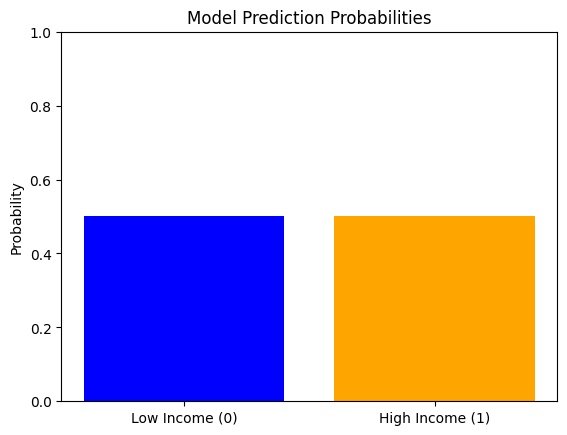

In [56]:
import matplotlib.pyplot as plt

# Probabilities from model output
classes = ['Low Income (0)', 'High Income (1)']
probabilities = [0.5, 0.5]

plt.bar(classes, probabilities, color=['blue', 'orange'])
plt.ylabel("Probability")
plt.title("Model Prediction Probabilities")
plt.ylim(0, 1)  # Probabilities range from 0 to 1
plt.show()

In [57]:
print(df_test_new.iloc[10])
print(prediction_list[10])

age                               65
workclass                    Private
fnlwgt                        184454
education                    HS-grad
education_num                      9
marital_status    Married-civ-spouse
occupation         Machine-op-inspct
relationship                 Husband
race                           White
sex                             Male
capital_gain                    6418
capital_loss                       0
hours_per_week                    40
native_country         United-States
income                             1
new                             4225
Name: 10, dtype: object
{'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'probabilities': array([0.5, 0.5], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}


In [53]:
print(df_test_new.iloc[3])
print(prediction_list[3])

age                               44
workclass                    Private
fnlwgt                        160323
education               Some-college
education_num                     10
marital_status    Married-civ-spouse
occupation         Machine-op-inspct
relationship                 Husband
race                           Black
sex                             Male
capital_gain                    7688
capital_loss                       0
hours_per_week                    40
native_country         United-States
income                             1
new                             1936
Name: 3, dtype: object
{'logits': array([0.], dtype=float32), 'logistic': array([0.5], dtype=float32), 'probabilities': array([0.5, 0.5], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}


In [59]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/544.2 kB ? eta -:--:--
   ---------------------------------------- 544.2/544.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 3.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/30.3 MB 3.7 MB/s eta 0:00:08
   -- ------------------------------------- 1.6/30.3 MB 3.8 MB/s eta 0:00:08
   --- ------------------------------------ 2.4/30.3 MB 3.7 MB/s eta 0:00:08
   --- ------------------------------------ 2.6/30.3 MB 3.4 MB/s eta 0:00:09
   ---- ------------


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 
                    'relationship', 'race', 'sex', 'native_country']
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_train_new[col] = label_encoders[col].fit_transform(df_train_new[col])

In [64]:
print(df_train_new.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
new               0
dtype: int64


In [65]:
df_train_new = df_train_new.astype(float)

In [69]:
print(globals().keys())  # Lists all defined variables

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', '_i2', 'tf', 'pd', '_i3', 'PATH', 'PATH_test', '_i4', 'COLUMNS', '_i5', 'train_data', 'test_data', '_i6', '_i7', '_i8', 'label', 'label_t', '_i9', '_i10', '_i11', 'CONTI_FEATURES', 'CATE_FEATURES', '_i12', 'continous_features', '_i13', 'relationship', '_i14', 'categorical_features', '_i15', '_exit_code', '_i16', '_i17', 'model', '_i18', 'FEATURES', 'LABEL', 'get_input_fn', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', 'feature', '_i26', '_i27', 'os', '_i28', '_i29', '_i30', '_i31', '_i32', '_32', '_i33', 'square_var', '_i34', '_i35', 'df_train_new', 'df_test_new', '_i36', '_i37', 'CONTI_FEATURES_NEW', 'continuous_features_new', '_i38', 'model_1', '_i39', 'FEATURES_NEW', '_i40', '_i41', '_i42', '_i43', '_i44', 'model_dir', '_i45', '_i46', '_

In [73]:
import os
print(os.listdir("C:/Users/Osama/OneDrive/Desktop/Muffin-cupcake/Deeplearning"))

['.ipynb_checkpoints', 'Deeplearning.ipynb', 'eval', 'events.out.tfevents.1746386039.V', 'graph.pbtxt', 'ongoing', 'Tensorflow.ipynb']


In [75]:
df_train_new['education'] = df_train_new['education'].astype('category').cat.codes
df_test_new['education'] = df_test_new['education'].astype('category').cat.codes

In [76]:
education_column = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', vocabulary_list=df_train_new['education'].unique().tolist()
)

In [77]:
print(df_train_new.dtypes)

age               float64
workclass         float64
fnlwgt            float64
education            int8
education_num     float64
marital_status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country    float64
income            float64
new               float64
dtype: object


In [78]:
print(train_data.head())  # Check if numerical encoding is working properly

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours_per_week  native_country  income   new  
0              40              39       0  1521  
1              13              39       0  2500  
2 

In [80]:
print(df_train_new.isnull().sum())  # Ensure no missing values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
new               0
dtype: int64


In [81]:
education_column = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', vocabulary_list=df_train_new['education'].unique().tolist()
)

In [82]:
print(df_train_new.dtypes)

age               float64
workclass         float64
fnlwgt            float64
education            int8
education_num     float64
marital_status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country    float64
income            float64
new               float64
dtype: object


In [83]:
df_train_new.fillna(df_train_new.mean(), inplace=True)

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_new[['fnlwgt', 'capital_gain', 'capital_loss', 'new']] = scaler.fit_transform(df_train_new[['fnlwgt', 'capital_gain', 'capital_loss', 'new']])

In [85]:
feature_columns = [tf.feature_column.numeric_column(k) for k in df_train_new.columns]
print(feature_columns)  # Verify feature column structure

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='workclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education_num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='marital_status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='occupation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='relationship', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='race', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normali

In [118]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_train_new[col] = label_encoders[col].fit_transform(df_train_new[col])

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_new[['fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.fit_transform(df_train_new[['fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']])

In [124]:
feature_columns = [tf.feature_column.numeric_column(k, dtype=tf.float32) for k in df_train_new.columns]
print(feature_columns)

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='workclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education_num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='marital_status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='occupation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='relationship', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='race', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normali

In [130]:
df_train_new = df_train_new.apply(pd.to_numeric, errors='coerce')
df_train_new.fillna(-1, inplace=True)  # Replace missing values with -1 or another default value

In [131]:
print(df_train_new.dtypes)

age               float64
workclass           int64
fnlwgt            float64
education           int32
education_num     float64
marital_status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country      int64
income            float64
new               float64
dtype: object
